In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os
from collections import defaultdict
import pandas as pd

In [2]:
directory_106 = 'high_res_colormap/'
files_106 = [x for x in os.listdir(directory_106) if 'results' in x and 'paramgrid' in x and 'py' not in x]
directory_107 = 'high_res_colormap_scaled/'
files_107 = [x for x in os.listdir(directory_107) if 'results' in x and 'paramgrid' in x and 'py' not in x]

In [3]:
with open(directory_106+'paramgrid_appearance_highres_basic.txt', 'rb') as f:
    param_grid_106 = pickle.load(f)
all_param_table_106 = pd.DataFrame(param_grid_106)

with open(directory_107+'paramgrid_appearance_highres_basic.txt', 'rb') as f:
    param_grid_107 = pickle.load(f)
all_param_table_107 = pd.DataFrame(param_grid_107)

In [4]:
def parse_all_results(directory):
    files = [x for x in os.listdir(directory) if 'results' in x and 'paramgrid' in x and 'py' not in x]
    all_results = defaultdict(list)
    for f in files: 
        with open(directory+f, 'rb') as f:
            result = pickle.load(f)
        p = result['params']
        all_results[p].append(result)
    all_results = dict(all_results)
    return(all_results)

In [5]:
all_results_106 = parse_all_results(directory_106)
all_results_107 = parse_all_results(directory_107)

In [6]:
def get_death_emergence_numbers(all_results, nbatch):
    deaths, emergence = {}, {}

    for n in list(all_results.keys()):
        finished_runs = len(all_results[n])
        total_deaths, total_emergence = 0,0
        for batch in all_results[n]:
            total_deaths += sum(batch['deaths'])
            total_emergence += sum(batch['presence_VR'])
        total_deaths /= nbatch*finished_runs
        total_emergence/= nbatch*finished_runs
        deaths[n] = total_deaths
        emergence[n] = total_emergence
        
    return([deaths, emergence])

In [25]:
deaths_106, emergence_106 = get_death_emergence_numbers(all_results_106, 100)
deaths_107, emergence_107 = get_death_emergence_numbers(all_results_107, 100)

In [26]:
np.median(list(deaths_106.values()))

721.9145

In [27]:
def get_matrix_presence(all_results, all_param_table, q, dict_results, scaling, m = 10):
    
    i_values = sorted(list(set(all_param_table['i_threshold'])))
    c_values = sorted(list(set(all_param_table['c'])))
    
    matrix_results = np.zeros((len(i_values), len(c_values)))
    
    for i in range(len(i_values)):
        for j in range(len(c_values)):
            param_pos = all_param_table.index[(all_param_table['i_threshold'] == i_values[::-1][i])
                                              &(all_param_table['c'] == c_values[j])
                                              &(all_param_table['q'] == q)].to_list()[0]
            
            if param_pos in all_results:
                if scaling:
                    matrix_results[i,j] = 1-(1-dict_results[param_pos])**m
                else:
                    matrix_results[i,j] = dict_results[param_pos]
            else:
                matrix_results[i,j] = nan

    return(matrix_results)

def calculate_ticks(ticklabels, truerange, tickrange):
    tick_pos = []
    for l in ticklabels:
        tick_pos.append((l*(tickrange[0]+tickrange[1]))/(truerange[0]+truerange[1]))
    return(tick_pos)

In [28]:
deaths_matrix_106_q1, emergence_matrix_106_q1 = get_matrix_presence(all_results_106, all_param_table_106, 1, deaths_106, False, m = 10), get_matrix_presence(all_results_106, all_param_table_106, 1, emergence_106, False, m = 10)
deaths_matrix_106_q04, emergence_matrix_106_q04 = get_matrix_presence(all_results_106, all_param_table_106, 0.4, deaths_106, False, m = 10), get_matrix_presence(all_results_106, all_param_table_106, 0.4, emergence_106, False, m = 10)

In [29]:
deaths_matrix_107_q1, emergence_matrix_107_q1 = get_matrix_presence(all_results_107, all_param_table_107, 1, deaths_107, True, m = 10), get_matrix_presence(all_results_107, all_param_table_107, 1, emergence_107, True, m = 10)
deaths_matrix_107_q04, emergence_matrix_107_q04 = get_matrix_presence(all_results_107, all_param_table_107, 0.4, deaths_107, True, m = 10), get_matrix_presence(all_results_107, all_param_table_107, 0.4, emergence_107, True, m = 10)

In [30]:
for i in range(2):
    for j in range(2):
        ax[i,j].set_yticks(calculate_ticks([10,250,500,750,1000], [10,1000], [0,39]))
        ax[i,j].set_yticklabels(['10','250','500','750','1,000'][::-1], fontsize = 12)

        ax[i,j].set_xticks(calculate_ticks([10,2500,5000,7500,10000], [10,10000], [0,39]))
        ax[i,j].set_xticklabels(['10', '2,500','5,000','7,500','10,000'], fontsize = 12)

        
        if i<1:
            #ax[i,j].set_yticks(calculate_ticks([10,500,1000,1500,2000], [10,2000], [0,24]))
            #ax[i,j].set_yticklabels([int(np.round(i_values[x])) for x in np.arange(0,25,4)[::-1]])
            #ax[i,j].set_yticklabels(['100','5000','10,000','15,000','20,000'][::-1], fontsize = 12)
            #ax[i,j].set_xticks(np.arange(0,25,4))
            ax[i,j].set_xticks(calculate_ticks([10,2500,5000,7500,10000,12500,15000], [10,15000], [0,24]))
            #ax[i,j].set_xticklabels([int(np.round(c_values[x])) for x in np.arange(0,25,4)])
            ax[i,j].set_xticklabels(['100', '25,000','50,000','75,000','100,000','125,000','150,000'], fontsize = 12)
        ax[i,j].set_xlim(0,calculate_ticks([10,2500,5000,7500,10000,12500,15000], [10,15000], [0,24])[4])

In [31]:
emergence_matrix_106_q1

array([[0.224, 0.214, 0.19 , ..., 0.036, 0.028, 0.038],
       [0.215, 0.204, 0.181, ..., 0.034, 0.023, 0.036],
       [0.227, 0.197, 0.176, ..., 0.029, 0.032, 0.029],
       ...,
       [0.179, 0.061, 0.035, ..., 0.004, 0.002, 0.   ],
       [0.171, 0.024, 0.013, ..., 0.001, 0.   , 0.001],
       [0.089, 0.01 , 0.003, ..., 0.001, 0.001, 0.   ]])

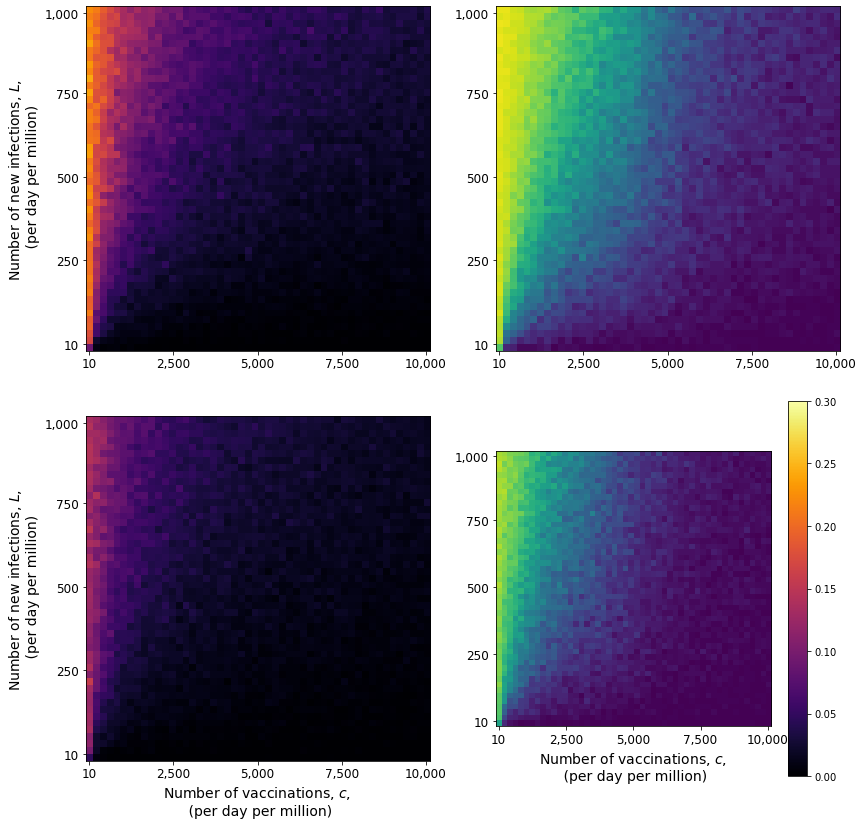

In [38]:
fig, ax = plt.subplots(2,2, figsize = (12,12))

im1 = ax[0,0].imshow(emergence_matrix_106_q1, vmin = 0, vmax = 0.3, cmap = 'inferno')
im2 = ax[1,0].imshow(emergence_matrix_106_q04, vmin = 0, vmax = 0.3, cmap = 'inferno')
im3 = ax[0,1].imshow(emergence_matrix_107_q1, vmin = 0, vmax = 1)
im4 = ax[1,1].imshow(emergence_matrix_107_q04, vmin = 0, vmax = 1)

for i in range(2):
    for j in range(2):
        ax[i,j].set_yticks(calculate_ticks([10,250,500,750,1000], [10,1000], [0,49]))
        ax[i,j].set_yticklabels(['10','250','500','750','1,000'][::-1], fontsize = 12)

        ax[i,j].set_xticks(calculate_ticks([10,2500,5000,7500,10000], [10,10000], [0,49]))
        ax[i,j].set_xticklabels(['10', '2,500','5,000','7,500','10,000'], fontsize = 12)
        
        #if j>0:
        #    ax[i,j].set_xticks(calculate_ticks([10,2500,5000,7500,10000], [10,10000], [0,49]))
        #    ax[i,j].set_xticklabels(['100', '25,000','50,000','75,000','100,000'], fontsize = 12)   
        #    ax[i,j].set_yticks(calculate_ticks([10,250,500,750,1000], [10,1000], [0,49]))
        #    ax[i,j].set_yticklabels(['100','2,500','5,000','7,500','10,000'][::-1], fontsize = 12)    

ax[0,0].set_ylabel('Number of new infections, $L$, \n (per day per million)', fontsize = 14)
ax[1,0].set_ylabel('Number of new infections, $L$, \n (per day per million)', fontsize = 14)
ax[1,0].set_xlabel('Number of vaccinations, $c$, \n (per day per million)', fontsize = 14)
ax[1,1].set_xlabel('Number of vaccinations, $c$, \n (per day per million)', fontsize = 14)

cbar = fig.colorbar(im1, orientation='vertical')

plt.tight_layout()

plt.savefig('high_resolution_figure4_SEPT10_colorbar2.jpg', dpi = 400)

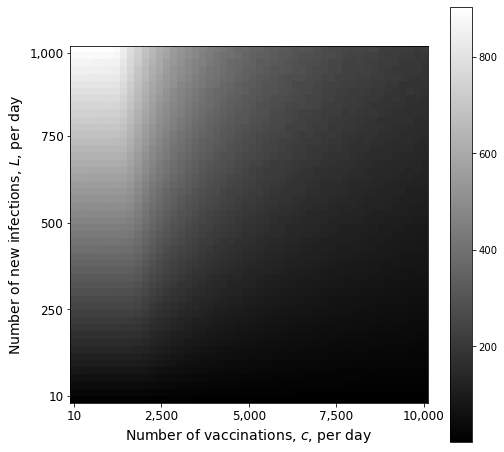

In [34]:
fig, ax = plt.subplots(figsize = (8,8))

plt.imshow(deaths_matrix_106_q1/4, cmap = 'gray')

ax.set_yticks(calculate_ticks([10,250,500,750,1000], [10,1000], [0,49]))
ax.set_yticklabels(['10','250','500','750','1,000'][::-1], fontsize = 12)

ax.set_xticks(calculate_ticks([10,2500,5000,7500,10000], [10,10000], [0,49]))
ax.set_xticklabels(['10', '2,500','5,000','7,500','10,000'], fontsize = 12)

ax.set_ylabel('Number of new infections, $L$, per day ', fontsize = 14)
ax.set_xlabel('Number of vaccinations, $c$, per day ', fontsize = 14)

plt.colorbar()
#plt.savefig('high_resolution_deaths.jpg', dpi = 400)
plt.show()

In [16]:
(1e6/(2000+10))*(2/3)

331.6749585406302

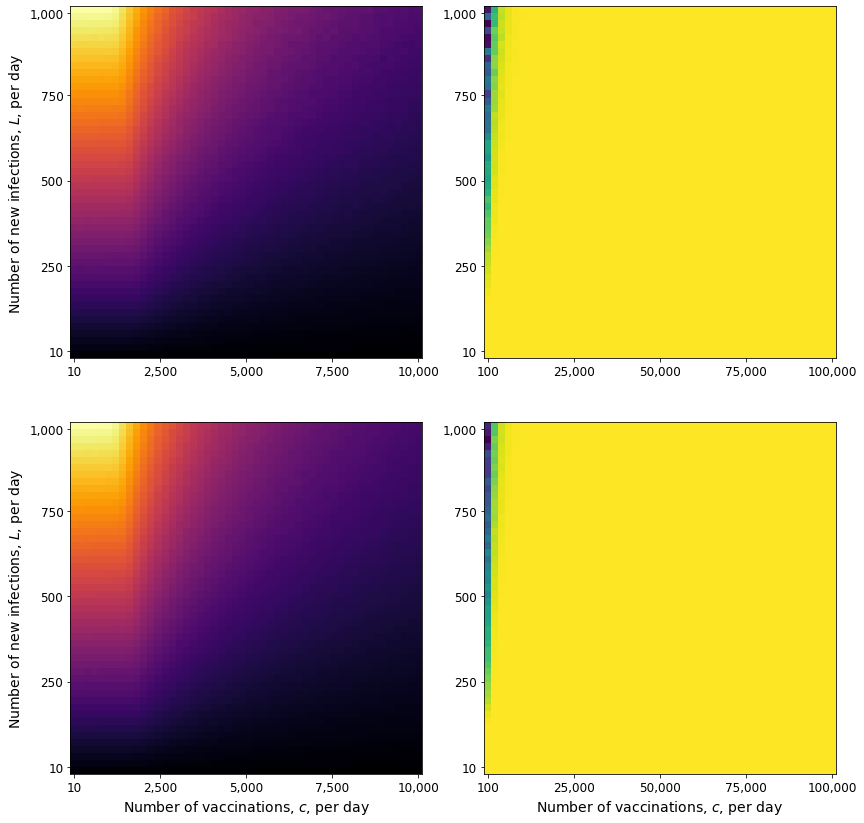

In [35]:
fig, ax = plt.subplots(2,2, figsize = (12,12))

im1 = ax[0,0].imshow(deaths_matrix_106_q1, vmin = 0, cmap = 'inferno')
im2 = ax[1,0].imshow(deaths_matrix_106_q04, vmin = 0, cmap = 'inferno')
im3 = ax[0,1].imshow(deaths_matrix_107_q1)
im4 = ax[1,1].imshow(deaths_matrix_107_q04)

for i in range(2):
    for j in range(2):
        ax[i,j].set_yticks(calculate_ticks([10,250,500,750,1000], [10,1000], [0,49]))
        ax[i,j].set_yticklabels(['10','250','500','750','1,000'][::-1], fontsize = 12)

        ax[i,j].set_xticks(calculate_ticks([10,2500,5000,7500,10000], [10,10000], [0,49]))
        ax[i,j].set_xticklabels(['10', '2,500','5,000','7,500','10,000'], fontsize = 12)
        
        if j>0:
            ax[i,j].set_xticks(calculate_ticks([10,2500,5000,7500,10000], [10,10000], [0,49]))
            ax[i,j].set_xticklabels(['100', '25,000','50,000','75,000','100,000'], fontsize = 12)            

ax[0,0].set_ylabel('Number of new infections, $L$, per day ', fontsize = 14)
ax[1,0].set_ylabel('Number of new infections, $L$, per day ', fontsize = 14)
ax[1,0].set_xlabel('Number of vaccinations, $c$, per day ', fontsize = 14)
ax[1,1].set_xlabel('Number of vaccinations, $c$, per day ', fontsize = 14)

#cbar = fig.colorbar(im3, orientation='vertical')

plt.tight_layout()

#plt.savefig('high_resolution_deaths.jpg', dpi = 400)

In [20]:
plt.imshow(matrices_deaths[1]*10)

NameError: name 'matrices_deaths' is not defined

In [34]:
set(all_param_table_106['delta'])

{1}

In [33]:
all_param_table_106

,N,a,c,d,delta,i_threshold,mu,q,s_threshold
0,1000000.0,0.25,10.0,0.01,1,10.000000,0.000001,0.4,0.1
1,1000000.0,0.25,10.0,0.01,1,10.000000,0.000001,1.0,0.1
2,1000000.0,0.25,10.0,0.01,1,30.204082,0.000001,0.4,0.1
3,1000000.0,0.25,10.0,0.01,1,30.204082,0.000001,1.0,0.1
4,1000000.0,0.25,10.0,0.01,1,50.408163,0.000001,0.4,0.1
...,...,...,...,...,...,...,...,...,...
4995,1000000.0,0.25,10000.0,0.01,1,959.591837,0.000001,1.0,0.1
4996,1000000.0,0.25,10000.0,0.01,1,979.795918,0.000001,0.4,0.1
4997,1000000.0,0.25,10000.0,0.01,1,979.795918,0.000001,1.0,0.1
4998,1000000.0,0.25,10000.0,0.01,1,1000.000000,0.000001,0.4,0.1


In [19]:
# parsing results

all_results_106[0]

[{'params': 0,
  'times': [6291.348266459499],
  'presence_VR': [False,
   False,
   False,
   True,
   False,
   False,
   False,
   False,
   False,
   False],
  'deaths': [142.0,
   166.0,
   162.0,
   148.0,
   163.0,
   159.0,
   157.0,
   156.0,
   144.0,
   158.0]},
 {'params': 0,
  'times': [28795.904798519165, 26395.262246056514],
  'presence_VR': [False,
   True,
   False,
   False,
   True,
   False,
   False,
   False,
   False,
   False],
  'deaths': [146.0,
   165.0,
   124.0,
   148.0,
   170.0,
   168.0,
   182.0,
   140.0,
   166.0,
   138.0]},
 {'params': 0,
  'times': [],
  'presence_VR': [False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False],
  'deaths': [166.0, 150.0, 146.0, 151.0, 133.0, 181.0, 147.0, 183.0, 137.0]},
 {'params': 0,
  'times': [],
  'presence_VR': [False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False,
   False],
  'deaths': [150.0,
   147.0,
   158.0,
   165.0,
   154.0,
  

In [ ]:
directory_Q1 = 'colormaps/'
files_Q1 = [x for x in os.listdir(directory_Q1) if 'results' in x and 'paramgrid' in x and 'py' not in x]

with open(directory_Q1+'paramgrid_appearance_realistic.txt', 'rb') as f:
    param_grid_Q1 = pickle.load(f)

all_results_Q1 = defaultdict(list)
for f in files_Q1: 
    with open(directory_Q1+f, 'rb') as f:
        result = pickle.load(f)
    p = result['params']
    all_results_Q1[p].append(result)
all_results_Q1 = dict(all_results_Q1)

all_param_table_Q1 = pd.DataFrame()
all_param_table_Q1 = all_param_table_Q1.append(param_grid_Q1)

i_values = sorted(list(set(all_param_table['i_threshold'])))
c_values = sorted(list(set(all_param_table['c'])))

mu_vals_Q1 = [1e-5,1e-6]